## Step 0: Importing the libraries

In [138]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check for GPU availability
if tf.config.list_physical_devices("GPU"):
  print("sd")
else:
  print("Sad")

sd


# Step 1: Data Preprocessing

In [139]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [140]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [141]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [142]:
# Dedicating a part of test data into validation
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.2)

In [143]:
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8000, 28, 28), (8000,), (2000, 28, 28), (2000,))

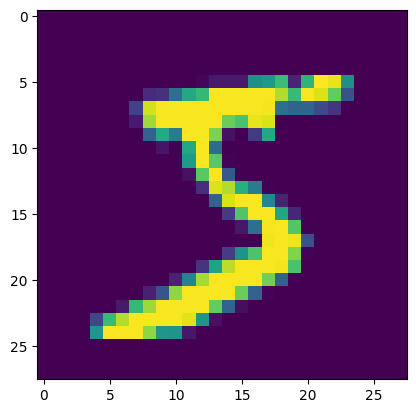

In [144]:
plt.imshow(X_train[0])

In [145]:
y_train[0]

5

In [146]:
X_train.min(), X_train.max()

(0, 255)

In [147]:
y_train.min(), y_train.max()

(0, 9)

In [148]:
# Convert the color channel values from 0-225 to 0-1 values
X_train = tf.image.convert_image_dtype(X_train, tf.float32)
X_train.numpy().min(), X_train.numpy().max()

(0.0, 1.0)

In [149]:
# Convert the color channel values from 0-225 to 0-1 values
X_test = tf.image.convert_image_dtype(X_test, tf.float32)
X_test.numpy().min(), X_test.numpy().max()

(0.0, 1.0)

In [150]:
X_train = tf.reshape(X_train, [60000, 28, 28, 1])
X_test = tf.reshape(X_test, [2000, 28, 28, 1])
X_val = tf.reshape(X_val, [8000, 28, 28, 1])

In [151]:
X_train.shape, X_test.shape, y_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([2000, 28, 28, 1]), (2000,))

In [152]:
# Finding the input shape for the conventinoal layer
input_shape = X_train[0].shape
input_shape

TensorShape([28, 28, 1])

# Step 2: Building a Model

In [153]:
# Define a Sequential object
model = tf.keras.models.Sequential()

In [154]:
# Add the first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

# Add the second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# Add flatten layer
model.add(tf.keras.layers.Flatten())

# Add dense layer or fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [155]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [156]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_accuracy'])


In [157]:
history = model.fit(X_train[0:59000], y_train[0:59000], batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
461/461 [==============================] - 5s 8ms/step - loss: 0.1780 - sparse_categorical_accuracy: 0.9469 - val_loss: 8.8408 - val_sparse_categorical_accuracy: 0.9800
Epoch 2/10
461/461 [==============================] - 4s 8ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0.9828 - val_loss: 4.9425 - val_sparse_categorical_accuracy: 0.9875
Epoch 3/10
461/461 [==============================] - 4s 8ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9881 - val_loss: 5.2702 - val_sparse_categorical_accuracy: 0.9891
Epoch 4/10
461/461 [==============================] - 3s 8ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9911 - val_loss: 4.8469 - val_sparse_categorical_accuracy: 0.9899
Epoch 5/10
461/461 [==============================] - 3s 7ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9936 - val_loss: 6.1509 - val_sparse_categorical_accuracy: 0.9895
Epoch 6/10
461/461 [==============================] - 3s 8ms/step - loss: 0.0184 - sparse_categorica

# Step 3: Predicting The Digits

In [158]:
# model predictions
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)
len(classes_x)

63/63 [==============================] - 0s 2ms/step


2000

In [159]:
len(X_test)

2000

# Step 4: Evaluating The Model

In [160]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, classes_x)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 227,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 223,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0, 204,   0,   1,   0,   1,   0,   0],
       [  0,   0,   0,   0, 188,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0, 197,   1,   0,   0,   0],
       [  0,   1,   1,   0,   0,   4, 201,   0,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0, 199,   0,   1],
       [  1,   0,   1,   0,   0,   0,   0,   0, 199,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 164]])

In [161]:
accuracy_score(y_test, classes_x)

0.99

In [162]:
X_train

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  

In [163]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_prob == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title((pred_prob,
                                    true_label),
                                    color=color)

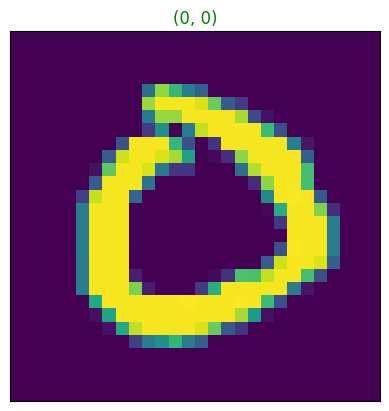

In [164]:
plot_pred(prediction_probabilities=classes_x, labels=y_test, images=X_test, n=10)

In [165]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

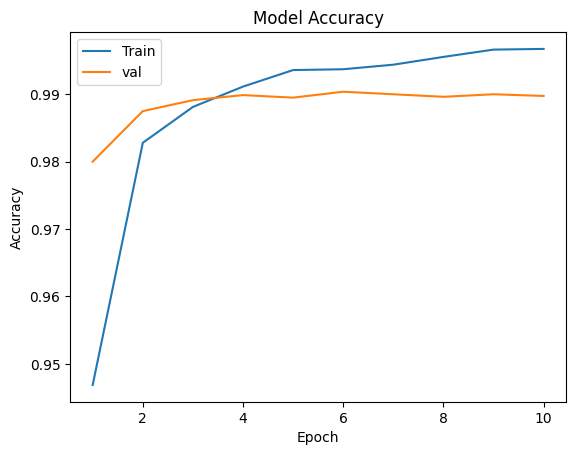

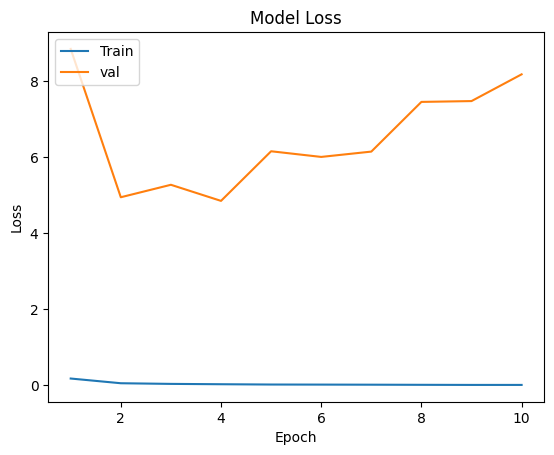

In [166]:
learning_curve(history, 10)

In [167]:
# This function is for ploting the top 10 predictions
def plot_pred_conf(prediction_probabilities, labels, n=0):

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Find top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 predictions confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]


  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_indexes)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_indexes)),
             labels=top_10_pred_indexes,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_indexes):
    top_plot[np.argmax(top_10_pred_indexes == true_label)].set_color("green")
  else:
    pass

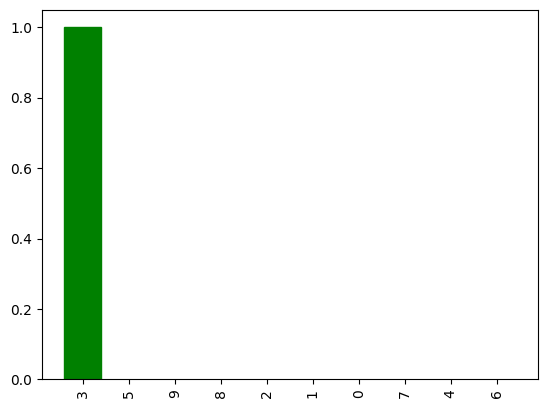

In [168]:
plot_pred_conf(prediction_probabilities=predict_x, labels=y_test, n=1)


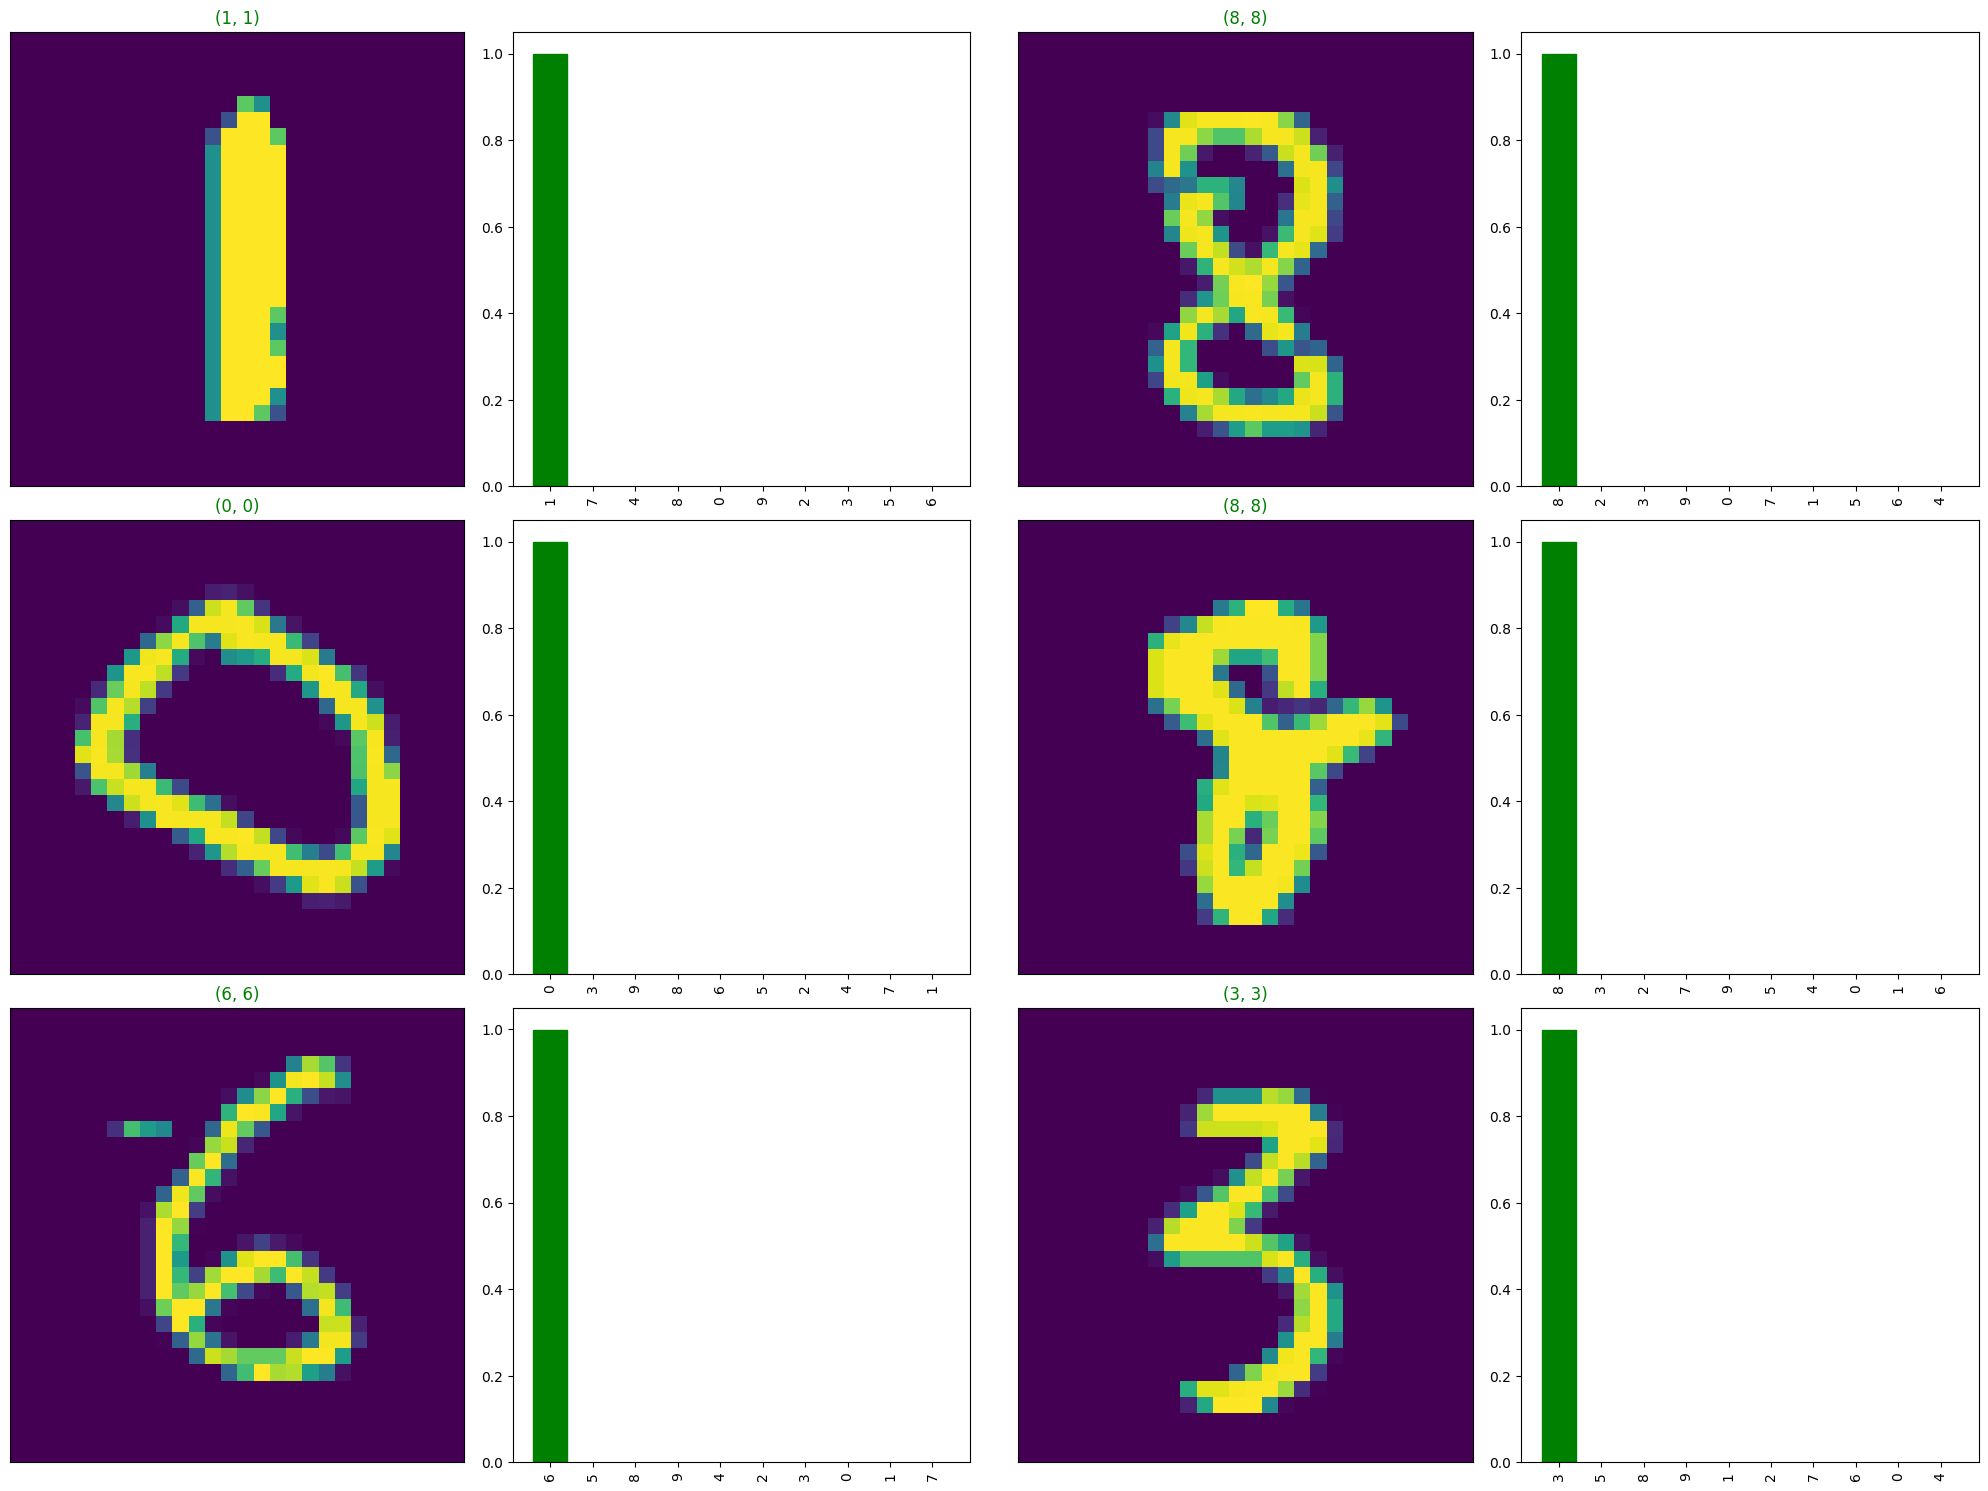

In [169]:
# Cheking the predictions and their different values
i_multiplier = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=classes_x,
            labels=y_test,
            images=X_test,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predict_x,
                 labels=y_test,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
